In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import atlite
import numpy as np
import logging 
logging.basicConfig(level=logging.INFO)
import xesmf as xe

/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


In [2]:
ds_era5=xr.open_dataset("/groups/EXTREMES/cutouts/europe-1989-era5.nc")
ds_era5

<xarray.Dataset> Size: 17GB
Dimensions:           (x: 189, y: 157, time: 8760)
Coordinates:
  * x                 (x) float64 2kB -12.0 -11.75 -11.5 ... 34.5 34.75 35.0
  * y                 (y) float64 1kB 33.0 33.25 33.5 33.75 ... 71.5 71.75 72.0
  * time              (time) datetime64[ns] 70kB 1989-01-01 ... 1989-12-31T23...
    lon               (x) float64 2kB ...
    lat               (y) float64 1kB ...
Data variables: (12/13)
    height            (y, x) float32 119kB ...
    wnd100m           (time, y, x) float32 1GB ...
    wnd_azimuth       (time, y, x) float32 1GB ...
    roughness         (time, y, x) float32 1GB ...
    influx_toa        (time, y, x) float32 1GB ...
    influx_direct     (time, y, x) float32 1GB ...
    ...                ...
    albedo            (time, y, x) float32 1GB ...
    solar_altitude    (time, y, x) float64 2GB ...
    solar_azimuth     (time, y, x) float64 2GB ...
    temperature       (time, y, x) float64 2GB ...
    soil temperature  (time, y, x) float64 2GB ...
    runoff            (time, y, x) float32 1GB ...
Attributes:
    module:             era5
    prepared_features:  ['wind', 'runoff', 'temperature', 'height', 'influx']
    chunksize_time:     100
    Conventions:        CF-1.6
    history:            2023-02-20 09:56:05 GMT by grib_to_netcdf-2.25.1: /op...

In [3]:
ds_canesm5=xr.open_dataset("/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1989.nc")
ds_canesm5

<xarray.Dataset> Size: 20MB
Dimensions:   (time: 2920, lat: 20, lon: 28)
Coordinates:
  * lon       (lon) float32 112B -28.12 -25.31 -22.5 -19.69 ... 42.19 45.0 47.81
  * lat       (lat) float32 80B 20.93 23.72 26.51 29.3 ... 68.37 71.16 73.95
  * time      (time) object 23kB 1989-01-01 01:30:00 ... 1989-12-31 22:30:00
Data variables:
    rsds      (time, lat, lon) float32 7MB ...
    rsdsdiff  (time, lat, lon) float32 7MB ...
    tas       (time, lat, lon) float32 7MB ...
Attributes:
    data_source:    Processed data from CMIP6 runs
    experiment:     historical
    source:         CanESM5
    variant_label:  r1i1p2f1
    data_written:   12/03/2025 14:04

In [4]:
ds1x1=xr.open_dataset('/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/europe_1x1.nc')

In [5]:
from regridding_functions import read_and_average_era5_marta
from regridding_functions import read_and_average_cmip
rsds_era5_mean= read_and_average_era5_marta('influx_direct')
rsds_model_mean= read_and_average_cmip('SFCRAD/CanESM5/historical/r1i1p2f1/', 'rsds')

['/groups/EXTREMES/cutouts/europe-1980-era5.nc', '/groups/EXTREMES/cutouts/europe-1981-era5.nc', '/groups/EXTREMES/cutouts/europe-1982-era5.nc', '/groups/EXTREMES/cutouts/europe-1983-era5.nc', '/groups/EXTREMES/cutouts/europe-1984-era5.nc', '/groups/EXTREMES/cutouts/europe-1985-era5.nc', '/groups/EXTREMES/cutouts/europe-1986-era5.nc', '/groups/EXTREMES/cutouts/europe-1987-era5.nc', '/groups/EXTREMES/cutouts/europe-1988-era5.nc', '/groups/EXTREMES/cutouts/europe-1989-era5.nc', '/groups/EXTREMES/cutouts/europe-1990-era5.nc', '/groups/EXTREMES/cutouts/europe-1991-era5.nc', '/groups/EXTREMES/cutouts/europe-1992-era5.nc', '/groups/EXTREMES/cutouts/europe-1993-era5.nc', '/groups/EXTREMES/cutouts/europe-1994-era5.nc', '/groups/EXTREMES/cutouts/europe-1995-era5.nc', '/groups/EXTREMES/cutouts/europe-1996-era5.nc', '/groups/EXTREMES/cutouts/europe-1997-era5.nc', '/groups/EXTREMES/cutouts/europe-1998-era5.nc', '/groups/EXTREMES/cutouts/europe-1999-era5.nc', '/groups/EXTREMES/cutouts/europe-2000-e

In [6]:
rsds_era5_mean_cut=rsds_era5_mean.sel(x=slice(-12, 35), y=slice(33, 72))
rsds_model_mean_cut=rsds_model_mean.sel(lon=slice(-12, 35), lat=slice(33, 72))

In [7]:
from regridding_functions import regrid
regridder_era5=regrid(rsds_era5_mean_cut, ds1x1, method='conservative') #regrid erra5 to the 1ºx1º grid


189 190
157 158
48 49
40 41


In [8]:
regridder_era5

xESMF Regridder 
Regridding algorithm:       conservative 
Weight filename:            conservative_157x189_40x48.nc 
Reuse pre-computed weights? False 
Input grid shape:           (157, 189) 
Output grid shape:          (40, 48) 
Periodic in longitude?      False

In [9]:
rsds_era5_mean_interp_cut=regridder_era5(rsds_era5_mean_cut)
rsds_era5_mean_interp_cut

/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/xesmf/frontend.py:718: UserWarning: Using dimensions ('y', 'x') from data variable influx_direct as the horizontal dimensions for the regridding.
  warnings.warn(


<xarray.DataArray (lat: 40, lon: 48)> Size: 8kB
dask.array<astype, shape=(40, 48), dtype=float32, chunksize=(40, 48), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 320B 33.0 34.0 35.0 36.0 37.0 ... 69.0 70.0 71.0 72.0
  * lon      (lon) float64 384B -12.0 -11.0 -10.0 -9.0 ... 32.0 33.0 34.0 35.0
Attributes:
    regrid_method:  conservative

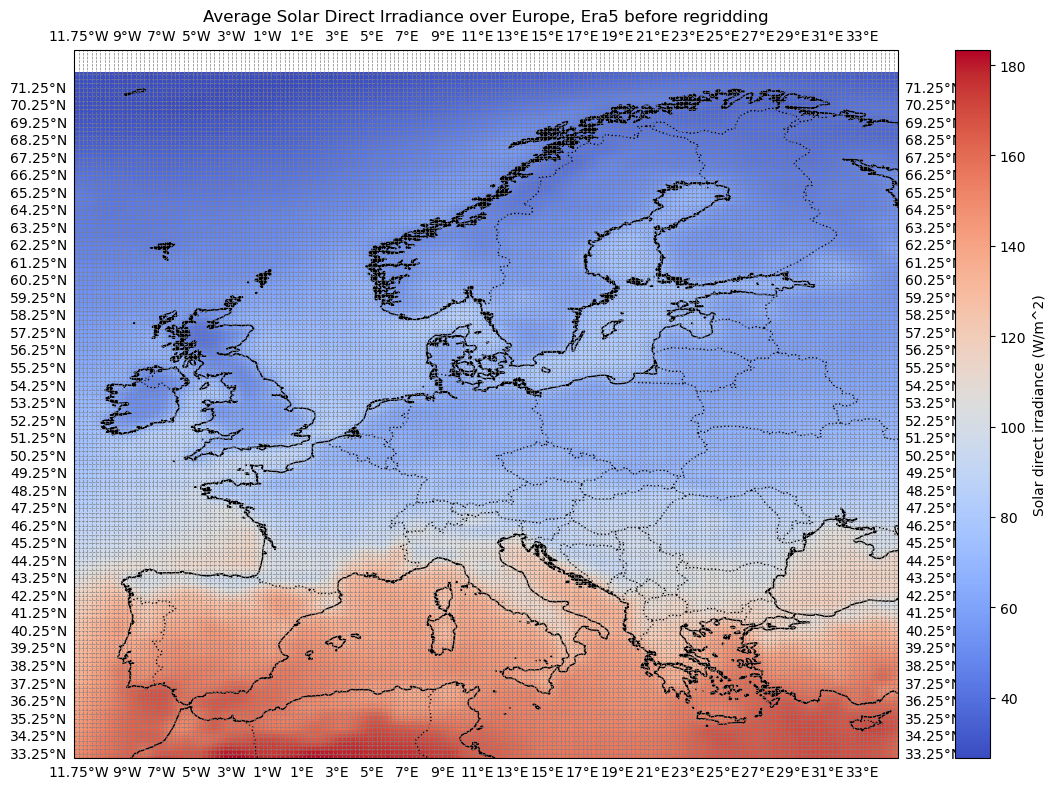

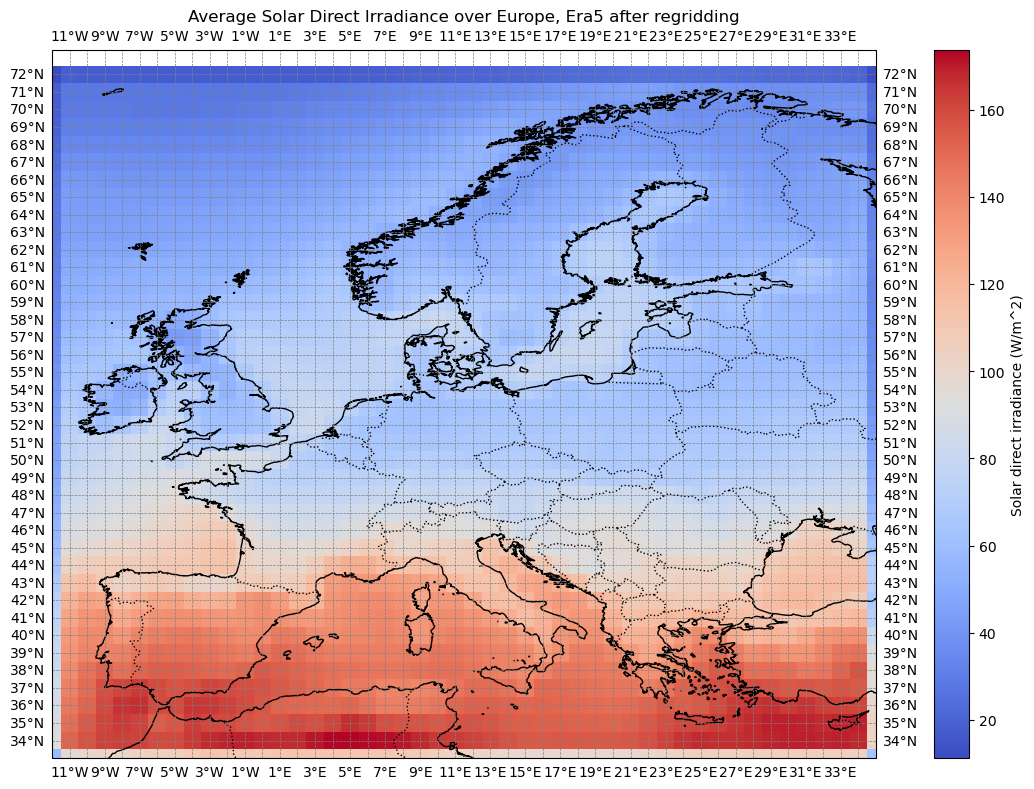

In [10]:
# Extract the longitude and latitude from the datasets
lon_era5 = rsds_era5_mean_cut.lon
lat_era5 = rsds_era5_mean_cut.lat
lon_era5_interp_cut = rsds_era5_mean_interp_cut.lon
lat_era5_interp_cut = rsds_era5_mean_interp_cut.lat

# Create the figure for rsds_era5_mean (before regridding)
fig1, ax1 = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax1.set_title('rsds_era5_mean (Before Regridding)')
rsds_era5_mean_cut.plot(
    ax=ax1,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for solar irradiance
    cbar_kwargs={'label': 'Solar direct irradiance (W/m^2)'}
)

# Add map features for context
ax1.coastlines(resolution='10m', linewidth=1)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.add_feature(cfeature.OCEAN, facecolor='white')

# Add gridlines for exact latitude and longitude points (before regridding)
ax1.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--', xlocs=lon_era5, ylocs=lat_era5, x_inline=False, y_inline=False)

# Set the extent to Europe for the first plot
ax1.set_extent([lon_era5.min(), lon_era5.max(), lat_era5.min(), lat_era5.max()])

# Show the first plot
plt.title(f'Average Solar Direct Irradiance over Europe, Era5 before regridding')
plt.tight_layout()
plt.show()

# Create the figure for rsds_era5_mean_interp (after regridding)
fig2, ax2 = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax2.set_title('rsds_era5_mean_interp (After Regridding)')
rsds_era5_mean_interp_cut.plot(
    ax=ax2,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for solar irradiance
    cbar_kwargs={'label': 'Solar direct irradiance (W/m^2)'}
)

# Add map features for context
ax2.coastlines(resolution='10m', linewidth=1)
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.add_feature(cfeature.OCEAN, facecolor='white')

# Add gridlines for exact latitude and longitude points (after regridding)
ax2.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--', xlocs=lon_era5_interp_cut, ylocs=lat_era5_interp_cut, x_inline=False, y_inline=False)

# Set the extent to Europe for the second plot
ax2.set_extent([lon_era5_interp_cut.min(), lon_era5_interp_cut.max(), lat_era5_interp_cut.min(), lat_era5_interp_cut.max()]) #I choose the smaller coordinate range from Era5

# Show the second plot
plt.title(f'Average Solar Direct Irradiance over Europe, Era5 after regridding')
plt.tight_layout()
plt.show()

In [11]:
from regridding_functions import regrid
regridder_model=regrid(rsds_model_mean_cut, ds1x1, method='bilinear') #regrid erra5 to the 1ºx1º grid
regridder_model

17 18
14 15
48 49
40 41


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_14x17_40x48.nc 
Reuse pre-computed weights? False 
Input grid shape:           (14, 17) 
Output grid shape:          (40, 48) 
Periodic in longitude?      False

In [12]:
rsds_model_mean_interp_cut=regridder_model(rsds_model_mean_cut)
rsds_model_mean_interp_cut

/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/xesmf/frontend.py:718: UserWarning: Using dimensions ('lat', 'lon') from data variable rsds as the horizontal dimensions for the regridding.
  warnings.warn(


<xarray.DataArray (lat: 40, lon: 48)> Size: 8kB
dask.array<astype, shape=(40, 48), dtype=float32, chunksize=(40, 48), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 320B 33.0 34.0 35.0 36.0 37.0 ... 69.0 70.0 71.0 72.0
  * lon      (lon) float64 384B -12.0 -11.0 -10.0 -9.0 ... 32.0 33.0 34.0 35.0
Attributes:
    regrid_method:  bilinear

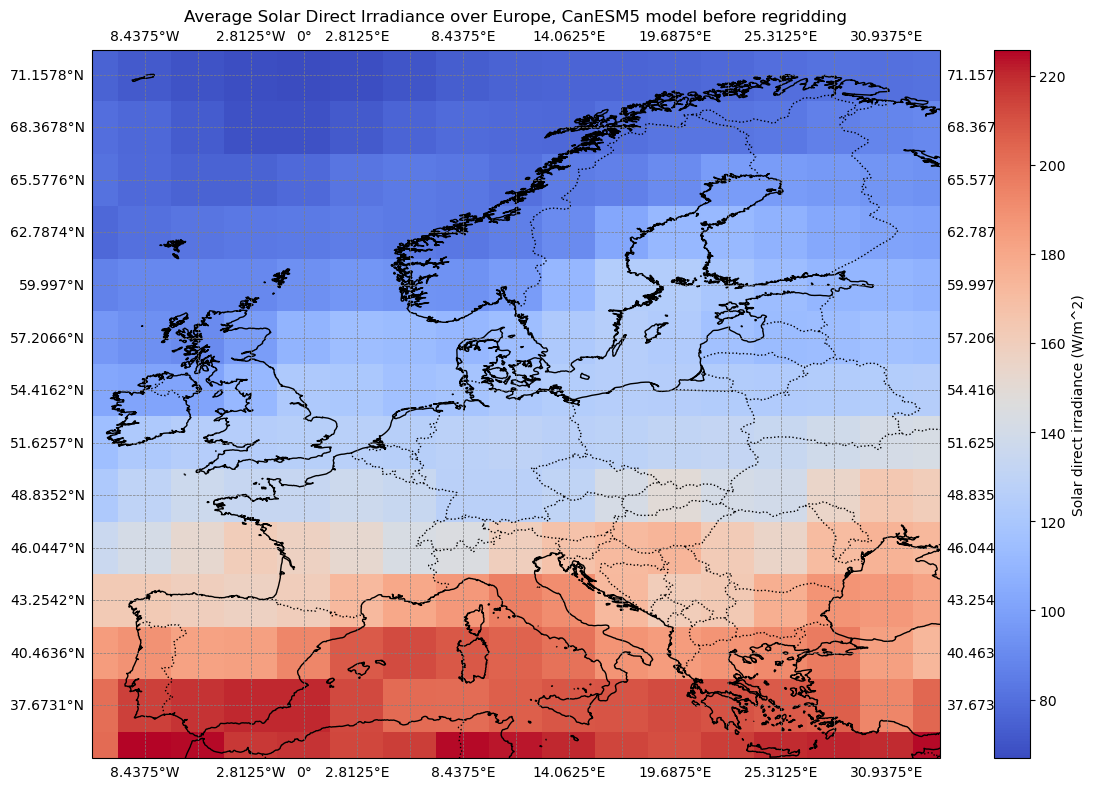

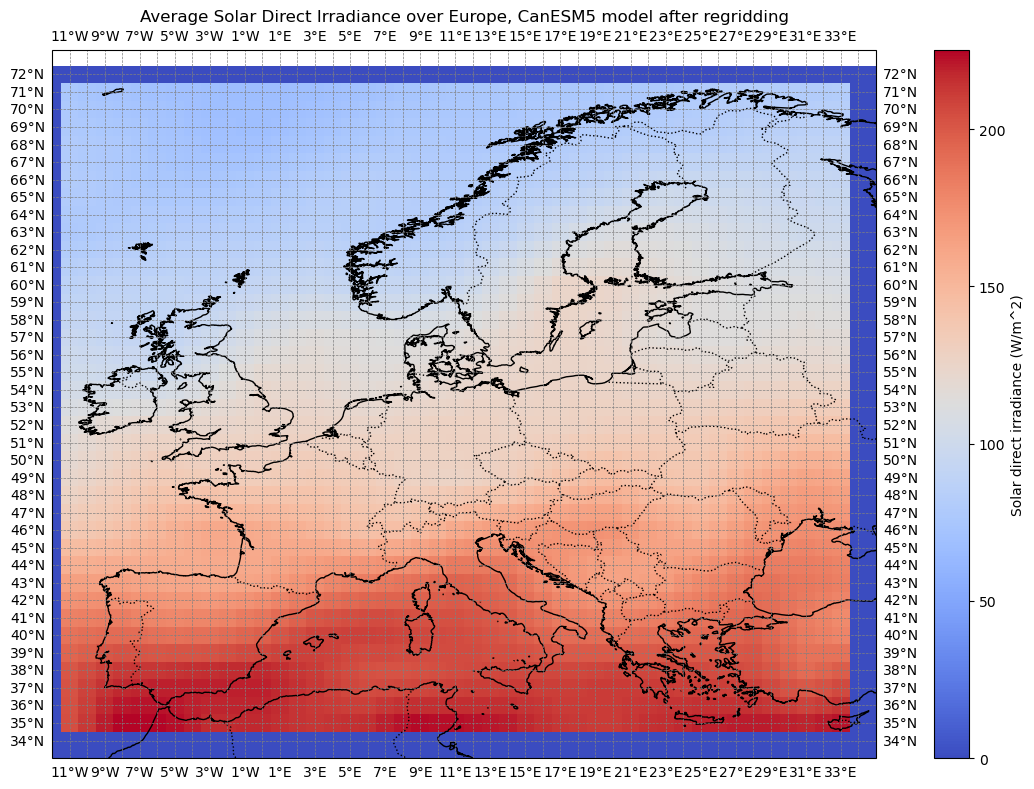

In [13]:
# Extract the longitude and latitude from the datasets
lon_model = rsds_model_mean_cut.lon
lat_model = rsds_model_mean_cut.lat
lon_model_interp_cut = rsds_model_mean_interp_cut.lon
lat_model_interp_cut = rsds_model_mean_interp_cut.lat

# Create the figure for rsds_model_mean (before regridding)
fig1, ax1 = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax1.set_title('rsds_model_mean (Before Regridding)')
rsds_model_mean_cut.plot(
    ax=ax1,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for solar irradiance
    cbar_kwargs={'label': 'Solar direct irradiance (W/m^2)'}
)

# Add map features for context
ax1.coastlines(resolution='10m', linewidth=1)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.add_feature(cfeature.OCEAN, facecolor='white')

# Add gridlines for exact latitude and longitude points (before regridding)
ax1.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--', xlocs=lon_model, ylocs=lat_model, x_inline=False, y_inline=False)

# Set the extent to Europe for the first plot
ax1.set_extent([lon_model.min(), lon_model.max(), lat_model.min(), lat_model.max()])

# Show the first plot
plt.title(f'Average Solar Direct Irradiance over Europe, CanESM5 model before regridding')
plt.tight_layout()
plt.show()

# Create the figure for rsds_model_mean_interp (after regridding)
fig2, ax2 = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax2.set_title('rsds_model_mean_interp (After Regridding)')
rsds_model_mean_interp_cut.plot(
    ax=ax2,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for solar irradiance
    cbar_kwargs={'label': 'Solar direct irradiance (W/m^2)'}
)

# Add map features for context
ax2.coastlines(resolution='10m', linewidth=1)
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.add_feature(cfeature.OCEAN, facecolor='white')

# Add gridlines for exact latitude and longitude points (after regridding)
ax2.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--', xlocs=lon_model_interp_cut, ylocs=lat_model_interp_cut, x_inline=False, y_inline=False)

# Set the extent to Europe for the second plot
ax2.set_extent([lon_model_interp_cut.min(), lon_model_interp_cut.max(), lat_model_interp_cut.min(), lat_model_interp_cut.max()]) #I choose the smaller coordinate range from model

# Show the second plot
plt.title(f'Average Solar Direct Irradiance over Europe, CanESM5 model after regridding')
plt.tight_layout()
plt.show()

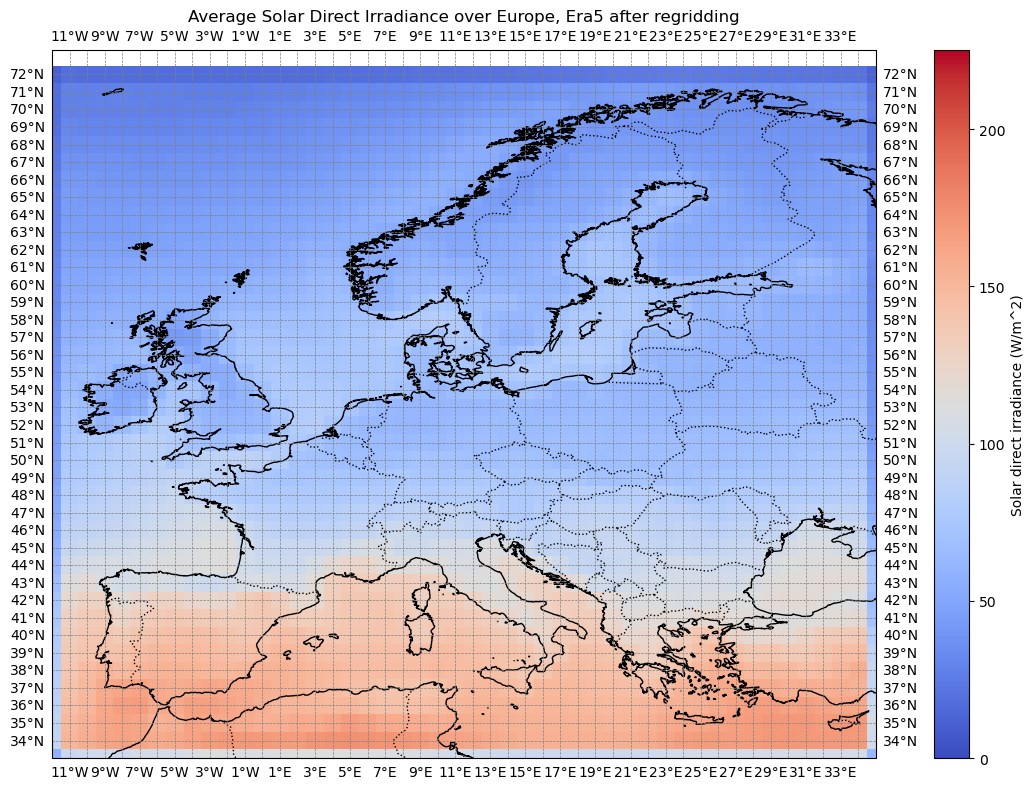

In [14]:
# Extract the longitude and latitude from the datasets
lon_era5 = rsds_era5_mean_cut.lon
lat_era5 = rsds_era5_mean_cut.lat
lon_era5_interp_cut = rsds_era5_mean_interp_cut.lon
lat_era5_interp_cut = rsds_era5_mean_interp_cut.lat

vmin=rsds_model_mean_interp_cut.min().values
vmax=rsds_model_mean_interp_cut.max().values

# Create the figure for rsds_era5_mean_interp (after regridding)
fig2, ax2 = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax2.set_title('rsds_era5_mean_interp (After Regridding)')
rsds_era5_mean_interp_cut.plot(
    ax=ax2,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for solar irradiance
    cbar_kwargs={'label': 'Solar direct irradiance (W/m^2)'},
    vmin=vmin,
    vmax=vmax
)

# Add map features for context
ax2.coastlines(resolution='10m', linewidth=1)
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.add_feature(cfeature.OCEAN, facecolor='white')

# Add gridlines for exact latitude and longitude points (after regridding)
ax2.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--', xlocs=lon_era5_interp_cut, ylocs=lat_era5_interp_cut, x_inline=False, y_inline=False)

# Set the extent to Europe for the second plot
ax2.set_extent([lon_era5_interp_cut.min(), lon_era5_interp_cut.max(), lat_era5_interp_cut.min(), lat_era5_interp_cut.max()]) #I choose the smaller coordinate range from Era5

# Show the second plot
plt.title(f'Average Solar Direct Irradiance over Europe, Era5 after regridding')
plt.tight_layout()
plt.show()

In [15]:
# Check the latitude and longitude range and increments for each dataset
def check_lat_lon_range_and_increment(ds, dataset_name):
    # Extract the latitude and longitude
    lat = ds.lat
    lon = ds.lon
    
    # Latitude and longitude range
    lat_range = (lat.min().values, lat.max().values)
    lon_range = (lon.min().values, lon.max().values)
    
    # Latitude and longitude increment (difference between consecutive values)
    lat_increment = np.abs(lat[1] - lat[0]).values
    lon_increment = np.abs(lon[1] - lon[0]).values
    
    print(f"Dataset: {dataset_name}")
    print(f"Latitude range: {lat_range}")
    print(f"Longitude range: {lon_range}")
    print(f"Latitude increment: {lat_increment} degrees")
    print(f"Longitude increment: {lon_increment} degrees")
    print("-" * 50)

# Check for rsds_era5_mean_cut
check_lat_lon_range_and_increment(rsds_era5_mean_cut, "rsds_era5_mean_cut")

# Check for rsds_era5_mean_interp_cut
check_lat_lon_range_and_increment(rsds_era5_mean_interp_cut, "rsds_era5_mean_interp_cut")

# Check for rsds_model_mean_cut
check_lat_lon_range_and_increment(rsds_model_mean_cut, "rsds_model_mean_cut")
# Check for rsds_model_mean_cut_interp
check_lat_lon_range_and_increment(rsds_model_mean_interp_cut, "rsds_model_mean_interp_cut")

Dataset: rsds_era5_mean_cut
Latitude range: (array(33.), array(72.))
Longitude range: (array(-12.), array(35.))
Latitude increment: 0.25 degrees
Longitude increment: 0.25 degrees
--------------------------------------------------
Dataset: rsds_era5_mean_interp_cut
Latitude range: (array(33.), array(72.))
Longitude range: (array(-12.), array(35.))
Latitude increment: 1.0 degrees
Longitude increment: 1.0 degrees
--------------------------------------------------
Dataset: rsds_model_mean_cut
Latitude range: (array(34.88252258), array(71.15775299))
Longitude range: (array(-11.25), array(33.75))
Latitude increment: 2.7905654907226562 degrees
Longitude increment: 2.8125 degrees
--------------------------------------------------
Dataset: rsds_model_mean_interp_cut
Latitude range: (array(33.), array(72.))
Longitude range: (array(-12.), array(35.))
Latitude increment: 1.0 degrees
Longitude increment: 1.0 degrees
--------------------------------------------------


/tmp/ipykernel_125455/957400691.py:7: RuntimeWarning: divide by zero encountered in divide
  biased_values = np.where(mask_valid, numerator / denominator, np.nan)  # Replace invalid cases with NaN


Longitude range: -11.25 to 33.75
Latitude range: 34.88252258300781 to 71.15775299072266


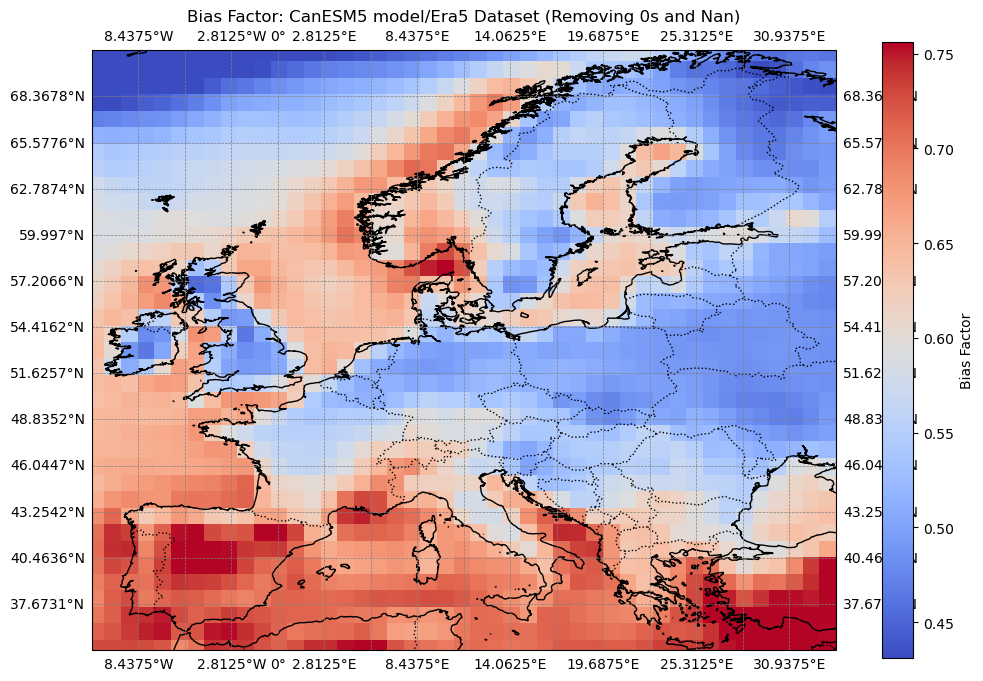

In [16]:
# Assuming these variables exist
denominator = rsds_model_mean_interp_cut.values 
numerator = rsds_era5_mean_interp_cut.values  

# Ensure valid bias factor calculation
mask_valid = (denominator != 0) & (numerator != 0)  # Avoid division by zero and all values in SARAH that have mean 0
biased_values = np.where(mask_valid, numerator / denominator, np.nan)  # Replace invalid cases with NaN

# Ensure correct shape (remove extra dimension if it exists)
biased_values = np.squeeze(biased_values)  # Remove extra dimensions (e.g., (2, 131, 177) to (131, 177))

# Check if the biased_values shape matches lon2d, lat2d
# Get lat/lon values
lon = rsds_model_mean_cut.lon.values 
lat = rsds_model_mean_cut.lat.values

lon_era5=rsds_era5_mean_cut.lon.values
lat_era5=rsds_era5_mean_cut.lat.values

# Ensure lon/lat are 2D using meshgrid
# Ensure lon/lat are 2D using meshgrid
lon_edges = np.linspace(lon_era5.min(), lon_era5.max()+0.25, biased_values.shape[1] )
lat_edges = np.linspace(lat_era5.min(), lat_era5.max(), biased_values.shape[0] )
lon2d, lat2d = np.meshgrid(lon_edges, lat_edges)

# Use percentiles to remove outliers
vmin = np.nanpercentile(biased_values, 2)  # 2nd percentile (lower bound)
vmax = np.nanpercentile(biased_values, 98)  # 98th percentile (upper bound)

lon_min, lon_max = lon.min(), lon.max()
lat_min, lat_max = lat.min(), lat.max()
print(f"Longitude range: {lon_min} to {lon_max}")
print(f"Latitude range: {lat_min} to {lat_max}")

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
# Set the exact extent to match the dataset boundaries
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Plot the bias factor (masked)
c = ax.pcolormesh(
    lon2d, lat2d, biased_values,  # Ensure correct shapes
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for bias factor
    shading='auto',
    vmin=vmin, vmax=vmax  # Clip extreme outliers
)

# Add map features
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.set_title("Bias Factor: CanESM5 model/Era5 Dataset (Removing 0s and Nan)")

# Add gridlines for each latitude and longitude
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--', xlocs=lon, ylocs=lat, x_inline=False, y_inline=False)

# Add colorbar
cbar = fig.colorbar(c, ax=ax, orientation='vertical', label='Bias Factor')

plt.show() 


In [17]:
# Calculate the 2nd and 98th percentiles to exclude outliers
lower_percentile = np.nanpercentile(biased_values, 2)  # 2nd percentile
upper_percentile = np.nanpercentile(biased_values, 98)  # 98th percentile

# Print the percentiles to check their range
print(f"2nd Percentile: {lower_percentile}")
print(f"98th Percentile: {upper_percentile}")

# Mask the biased_values to keep only those within the 2nd and 98th percentiles
filtered_biased_values = biased_values[(biased_values >= lower_percentile) & (biased_values <= upper_percentile)]

# Calculate the mean of the filtered values
mean_bias_factor_era5_model = np.nanmean(filtered_biased_values)

print(f"Mean Bias Factor (excluding outliers): {mean_bias_factor_era5_model:.3f}")

2nd Percentile: 0.43095412850379944
98th Percentile: 0.7560976147651672
Mean Bias Factor (excluding outliers): 0.595


In [18]:
lon_model_BOC = rsds_model_mean_interp_cut.lon.values 
lat_model_BOC = rsds_model_mean_interp_cut.lat.values

In [19]:
# Perform the multiplication while keeping the data as an xarray object
corrected_rsds_model_BOC = rsds_model_mean_interp_cut * biased_values

# Select the subset of data using .sel()
corrected_rsds_model_BOC = corrected_rsds_model_BOC.sel(
    lon=slice(lon_model_BOC.min(), lon_model_BOC.max()),
    lat=slice(lat_model_BOC.min(), lat_model_BOC.max())
)

# Count NaN values
nan_count = np.sum(np.isnan(corrected_rsds_model_BOC.values))
print(f"Number of NaN values in corrected_rsds_model_EOC: {nan_count}")

# Count total values
values_count = corrected_rsds_model_BOC.size
print(f"Total number of values in corrected_rsds_model_EOC: {values_count}")

corrected_rsds_model_BOC

Number of NaN values in corrected_rsds_model_EOC: 255
Total number of values in corrected_rsds_model_EOC: 1920


<xarray.DataArray (lat: 40, lon: 48)> Size: 8kB
dask.array<mul, shape=(40, 48), dtype=float32, chunksize=(40, 48), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 320B 33.0 34.0 35.0 36.0 37.0 ... 69.0 70.0 71.0 72.0
  * lon      (lon) float64 384B -12.0 -11.0 -10.0 -9.0 ... 32.0 33.0 34.0 35.0

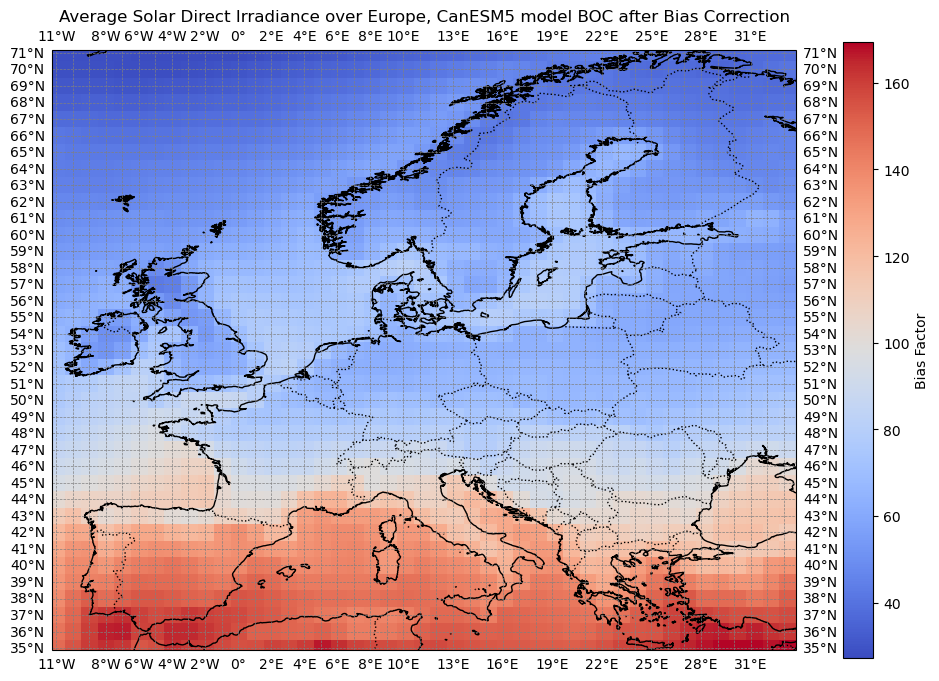

In [20]:
# Get lat/lon values
lon = rsds_model_mean_cut.lon.values 
lat = rsds_model_mean_cut.lat.values

lon_era5=rsds_era5_mean_cut.lon.values
lat_era5=rsds_era5_mean_cut.lat.values

lon_min, lon_max = lon.min(), lon.max()
lat_min, lat_max = lat.min(), lat.max()


# Ensure lon/lat are 2D using meshgrid
# Ensure lon/lat are 2D using meshgrid
lon_edges = np.linspace(lon_era5.min(), lon_era5.max()+0.25, biased_values.shape[1] )
lat_edges = np.linspace(lat_era5.min(), lat_era5.max(), biased_values.shape[0] )
lon2d, lat2d = np.meshgrid(lon_edges, lat_edges)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
# Set the exact extent to match the dataset boundaries
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Plot the bias factor (masked)
c = ax.pcolormesh(
    lon2d, lat2d, corrected_rsds_model_BOC,  # Ensure correct shapes
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for bias factor
    shading='auto',
)

# Add map features
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.set_title("Average Solar Direct Irradiance over Europe, CanESM5 model BOC after Bias Correction")

# Add gridlines for each latitude and longitude
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--', xlocs=rsds_era5_mean_interp_cut.lon, ylocs=rsds_era5_mean_interp_cut.lat, x_inline=False, y_inline=False)

# Add colorbar
cbar = fig.colorbar(c, ax=ax, orientation='vertical', label='Bias Factor')

plt.show() 

In [22]:
from regridding_functions import read_and_average_cmip_EOC_end
rsds_model_mean_EOC= read_and_average_cmip_EOC_end('SFCRAD/CanESM5/ssp585/r1i1p2f1/', 'rsds')
rsds_model_mean_EOC

['/groups/FutureWind/SFCRAD/CanESM5/ssp585/r1i1p2f1/rsds_rsdsdiff_tas_2070.nc', '/groups/FutureWind/SFCRAD/CanESM5/ssp585/r1i1p2f1/rsds_rsdsdiff_tas_2071.nc', '/groups/FutureWind/SFCRAD/CanESM5/ssp585/r1i1p2f1/rsds_rsdsdiff_tas_2072.nc', '/groups/FutureWind/SFCRAD/CanESM5/ssp585/r1i1p2f1/rsds_rsdsdiff_tas_2073.nc', '/groups/FutureWind/SFCRAD/CanESM5/ssp585/r1i1p2f1/rsds_rsdsdiff_tas_2074.nc', '/groups/FutureWind/SFCRAD/CanESM5/ssp585/r1i1p2f1/rsds_rsdsdiff_tas_2075.nc', '/groups/FutureWind/SFCRAD/CanESM5/ssp585/r1i1p2f1/rsds_rsdsdiff_tas_2076.nc', '/groups/FutureWind/SFCRAD/CanESM5/ssp585/r1i1p2f1/rsds_rsdsdiff_tas_2077.nc', '/groups/FutureWind/SFCRAD/CanESM5/ssp585/r1i1p2f1/rsds_rsdsdiff_tas_2078.nc', '/groups/FutureWind/SFCRAD/CanESM5/ssp585/r1i1p2f1/rsds_rsdsdiff_tas_2079.nc', '/groups/FutureWind/SFCRAD/CanESM5/ssp585/r1i1p2f1/rsds_rsdsdiff_tas_2080.nc', '/groups/FutureWind/SFCRAD/CanESM5/ssp585/r1i1p2f1/rsds_rsdsdiff_tas_2081.nc', '/groups/FutureWind/SFCRAD/CanESM5/ssp585/r1i1p2f1/

<xarray.DataArray 'rsds' (lat: 20, lon: 28)> Size: 2kB
dask.array<mean_agg-aggregate, shape=(20, 28), dtype=float32, chunksize=(20, 28), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 112B -28.12 -25.31 -22.5 -19.69 ... 42.19 45.0 47.81
  * lat      (lat) float32 80B 20.93 23.72 26.51 29.3 ... 68.37 71.16 73.95

In [23]:
rsds_model_mean_EOC_cut=rsds_model_mean_EOC.sel(lon=slice(-12, 35), lat=slice(33, 72))

In [24]:
from regridding_functions import regrid
regridder_model_EOC=regrid(rsds_model_mean_EOC_cut, ds1x1, method='bilinear') #regrid erra5 to the 1ºx1º grid
regridder_model_EOC

17 18
14 15
48 49
40 41


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_14x17_40x48.nc 
Reuse pre-computed weights? False 
Input grid shape:           (14, 17) 
Output grid shape:          (40, 48) 
Periodic in longitude?      False

In [25]:
rsds_model_mean_EOC_interp_cut=regridder_model_EOC(rsds_model_mean_EOC_cut)
rsds_model_mean_EOC_interp_cut

/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/xesmf/frontend.py:718: UserWarning: Using dimensions ('lat', 'lon') from data variable rsds as the horizontal dimensions for the regridding.
  warnings.warn(


<xarray.DataArray (lat: 40, lon: 48)> Size: 8kB
dask.array<astype, shape=(40, 48), dtype=float32, chunksize=(40, 48), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 320B 33.0 34.0 35.0 36.0 37.0 ... 69.0 70.0 71.0 72.0
  * lon      (lon) float64 384B -12.0 -11.0 -10.0 -9.0 ... 32.0 33.0 34.0 35.0
Attributes:
    regrid_method:  bilinear

In [26]:
lon_model = rsds_model_mean_EOC_interp_cut.lon.values 
lat_model = rsds_model_mean_EOC_interp_cut.lat.values

In [27]:
biased_values

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan, 0.7284735 , 0.729265  , ..., 0.7595097 ,        nan,
               nan],
       ...,
       [       nan, 0.37623805, 0.38143638, ..., 0.4831656 ,        nan,
               nan],
       [       nan, 0.3766105 , 0.37970835, ..., 0.4618407 ,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)

In [28]:
# Perform the multiplication while keeping the data as an xarray object
corrected_rsds_model_EOC = rsds_model_mean_EOC_interp_cut * biased_values

# Select the subset of data using .sel()
corrected_rsds_model_EOC = corrected_rsds_model_EOC.sel(
    lon=slice(lon_model.min(), lon_model.max()),
    lat=slice(lat_model.min(), lat_model.max())
)

# Count NaN values
nan_count = np.sum(np.isnan(corrected_rsds_model_EOC.values))
print(f"Number of NaN values in corrected_rsds_model_EOC: {nan_count}")

# Count total values
values_count = corrected_rsds_model_EOC.size
print(f"Total number of values in corrected_rsds_model_EOC: {values_count}")

corrected_rsds_model_EOC

Number of NaN values in corrected_rsds_model_EOC: 255
Total number of values in corrected_rsds_model_EOC: 1920


<xarray.DataArray (lat: 40, lon: 48)> Size: 8kB
dask.array<mul, shape=(40, 48), dtype=float32, chunksize=(40, 48), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 320B 33.0 34.0 35.0 36.0 37.0 ... 69.0 70.0 71.0 72.0
  * lon      (lon) float64 384B -12.0 -11.0 -10.0 -9.0 ... 32.0 33.0 34.0 35.0

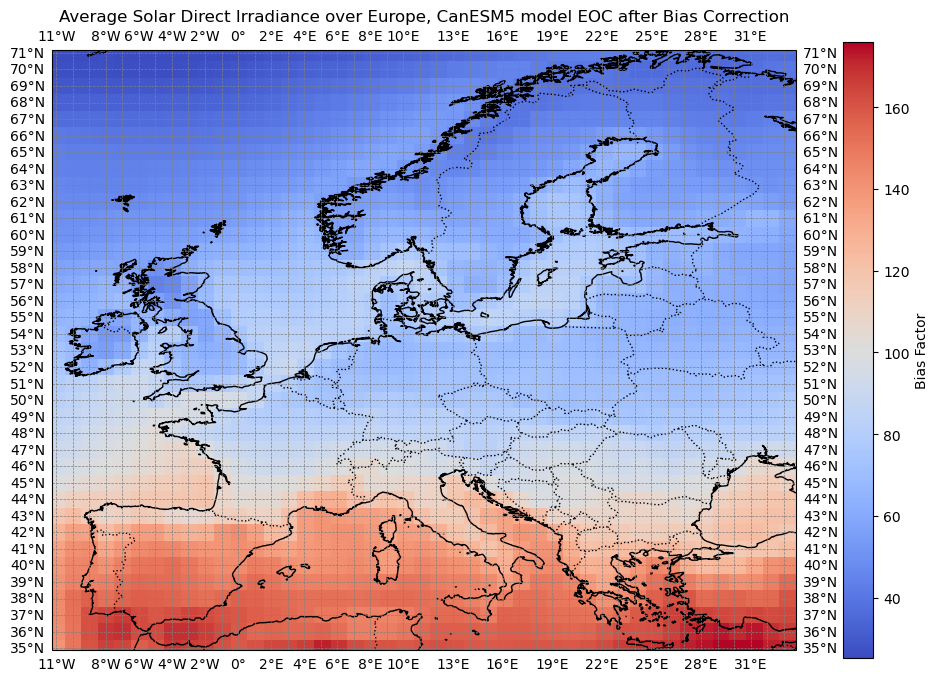

In [34]:
# Get lat/lon values
lon = rsds_model_mean_cut.lon.values 
lat = rsds_model_mean_cut.lat.values

lon_era5=rsds_era5_mean_cut.lon.values
lat_era5=rsds_era5_mean_cut.lat.values

lon_min, lon_max = lon.min(), lon.max()
lat_min, lat_max = lat.min(), lat.max()


# Ensure lon/lat are 2D using meshgrid
# Ensure lon/lat are 2D using meshgrid
lon_edges = np.linspace(lon_era5.min(), lon_era5.max()+0.25, biased_values.shape[1] )
lat_edges = np.linspace(lat_era5.min(), lat_era5.max(), biased_values.shape[0] )
lon2d, lat2d = np.meshgrid(lon_edges, lat_edges)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
# Set the exact extent to match the dataset boundaries
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Plot the bias factor (masked)
c = ax.pcolormesh(
    lon2d, lat2d, corrected_rsds_model_EOC,  # Ensure correct shapes
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for bias factor
    shading='auto',
)

# Add map features
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.set_title("Average Solar Direct Irradiance over Europe, CanESM5 model EOC after Bias Correction")

# Add gridlines for each latitude and longitude
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--', xlocs=rsds_model_mean_interp_cut.lon, ylocs=rsds_model_mean_interp_cut.lat, x_inline=False, y_inline=False)

# Add colorbar
cbar = fig.colorbar(c, ax=ax, orientation='vertical', label='Bias Factor')

plt.show() 

In [30]:
vmin_EOC=corrected_rsds_model_EOC.min().values
vmax_EOC=corrected_rsds_model_EOC.max().values

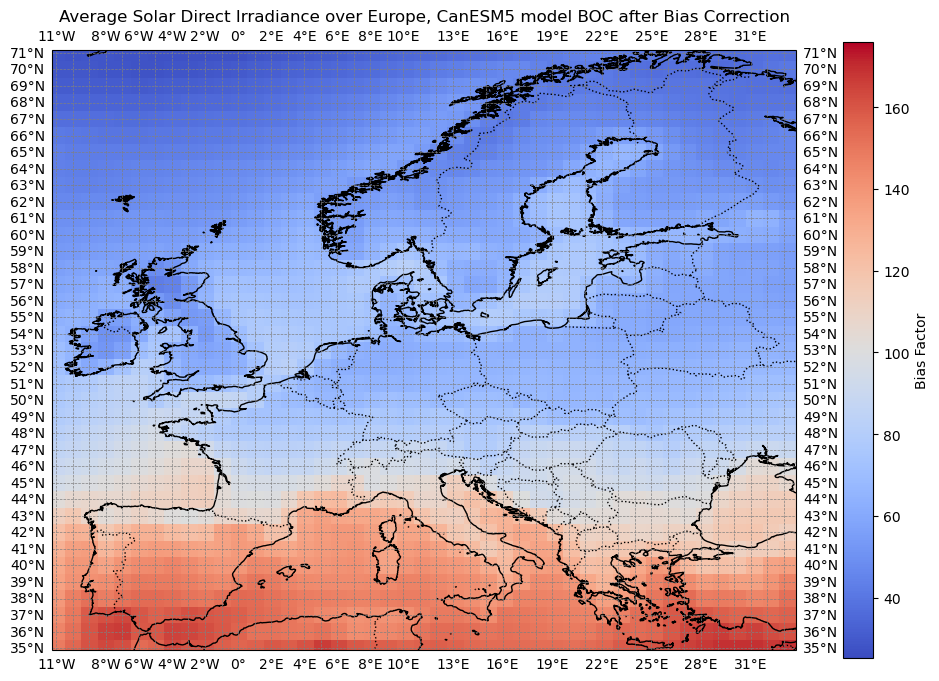

In [31]:
# Get lat/lon values
lon = rsds_model_mean_cut.lon.values 
lat = rsds_model_mean_cut.lat.values

lon_era5=rsds_era5_mean_cut.lon.values
lat_era5=rsds_era5_mean_cut.lat.values

lon_min, lon_max = lon.min(), lon.max()
lat_min, lat_max = lat.min(), lat.max()


# Ensure lon/lat are 2D using meshgrid
# Ensure lon/lat are 2D using meshgrid
lon_edges = np.linspace(lon_era5.min(), lon_era5.max()+0.25, biased_values.shape[1] )
lat_edges = np.linspace(lat_era5.min(), lat_era5.max(), biased_values.shape[0] )
lon2d, lat2d = np.meshgrid(lon_edges, lat_edges)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
# Set the exact extent to match the dataset boundaries
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Plot the bias factor (masked)
c = ax.pcolormesh(
    lon2d, lat2d, corrected_rsds_model_BOC,  # Ensure correct shapes
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for bias factor
    shading='auto',
    vmin=vmin_EOC,
    vmax=vmax_EOC   
)

# Add map features
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.set_title("Average Solar Direct Irradiance over Europe, CanESM5 model BOC after Bias Correction")

# Add gridlines for each latitude and longitude
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--', xlocs=rsds_era5_mean_interp_cut.lon, ylocs=rsds_era5_mean_interp_cut.lat, x_inline=False, y_inline=False)

# Add colorbar
cbar = fig.colorbar(c, ax=ax, orientation='vertical', label='Bias Factor')

plt.show() 

In [32]:
difference_EOC_BOC=corrected_rsds_model_EOC-corrected_rsds_model_BOC
relative_difference_EOC_BOC=difference_EOC_BOC/corrected_rsds_model_BOC*100

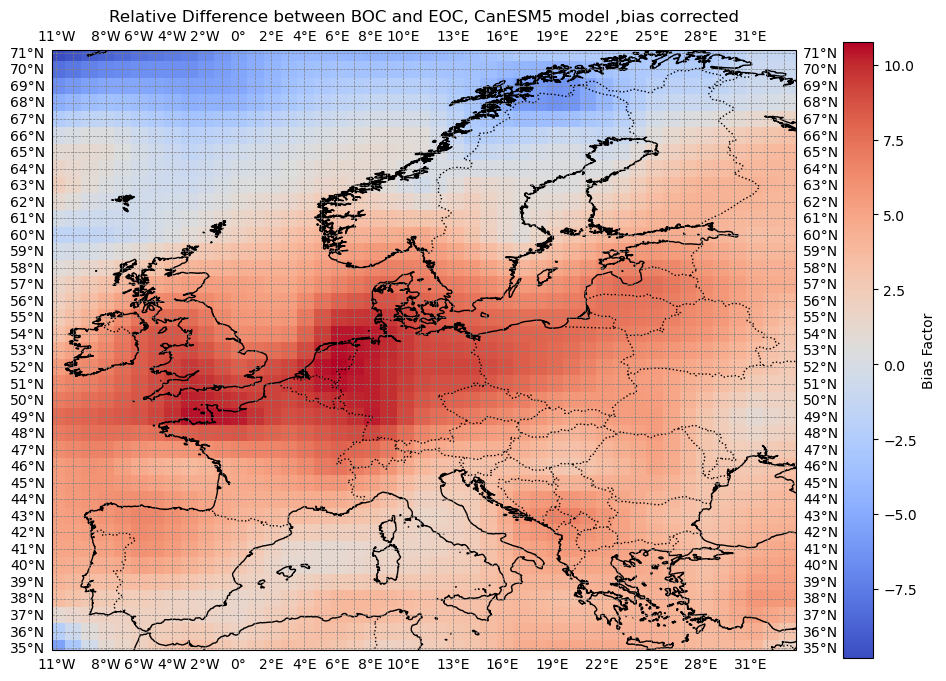

In [33]:
# Get lat/lon values
lon = rsds_model_mean_cut.lon.values 
lat = rsds_model_mean_cut.lat.values

lon_era5=rsds_era5_mean_cut.lon.values
lat_era5=rsds_era5_mean_cut.lat.values

lon_min, lon_max = lon.min(), lon.max()
lat_min, lat_max = lat.min(), lat.max()


# Ensure lon/lat are 2D using meshgrid
# Ensure lon/lat are 2D using meshgrid
lon_edges = np.linspace(lon_era5.min(), lon_era5.max()+0.25, biased_values.shape[1] )
lat_edges = np.linspace(lat_era5.min(), lat_era5.max(), biased_values.shape[0] )
lon2d, lat2d = np.meshgrid(lon_edges, lat_edges)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
# Set the exact extent to match the dataset boundaries
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Plot the bias factor (masked)
c = ax.pcolormesh(
    lon2d, lat2d, relative_difference_EOC_BOC,  # Ensure correct shapes
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for bias factor
    shading='auto'  
)

# Add map features
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.set_title("Relative Difference between BOC and EOC, CanESM5 model ,bias corrected")

# Add gridlines for each latitude and longitude
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--', xlocs=rsds_era5_mean_interp_cut.lon, ylocs=rsds_era5_mean_interp_cut.lat, x_inline=False, y_inline=False)

# Add colorbar
cbar = fig.colorbar(c, ax=ax, orientation='vertical', label='Bias Factor')

plt.show() 

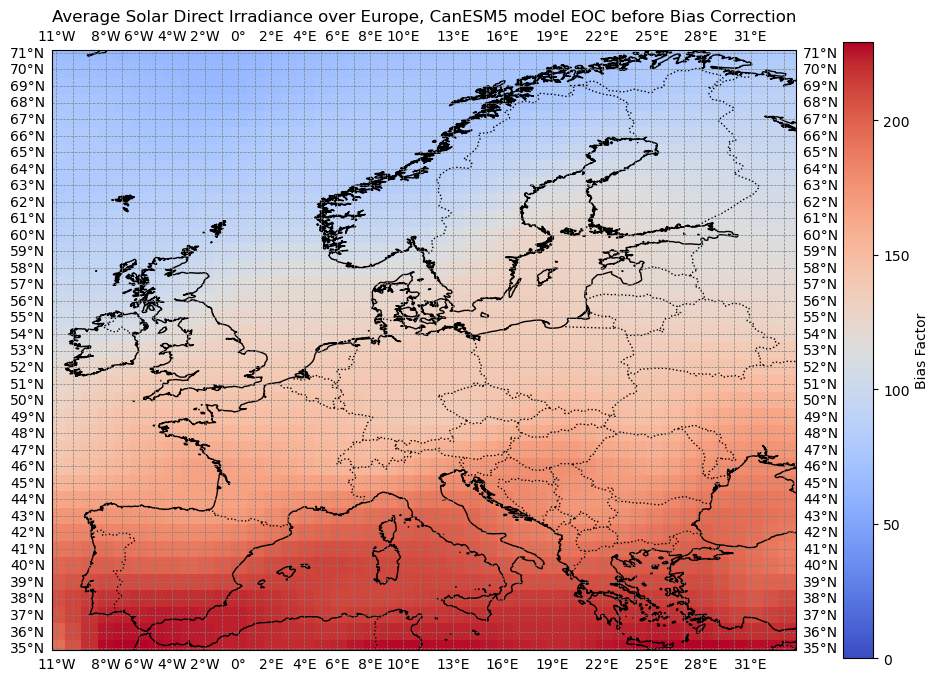

In [37]:
# Get lat/lon values
lon = rsds_model_mean_cut.lon.values 
lat = rsds_model_mean_cut.lat.values

lon_era5=rsds_era5_mean_cut.lon.values
lat_era5=rsds_era5_mean_cut.lat.values

lon_min, lon_max = lon.min(), lon.max()
lat_min, lat_max = lat.min(), lat.max()


# Ensure lon/lat are 2D using meshgrid
# Ensure lon/lat are 2D using meshgrid
lon_edges = np.linspace(lon_era5.min(), lon_era5.max()+0.25, biased_values.shape[1] )
lat_edges = np.linspace(lat_era5.min(), lat_era5.max(), biased_values.shape[0] )
lon2d, lat2d = np.meshgrid(lon_edges, lat_edges)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
# Set the exact extent to match the dataset boundaries
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Plot the bias factor (masked)
c = ax.pcolormesh(
    lon2d, lat2d, rsds_model_mean_EOC_interp_cut,  # Ensure correct shapes
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for bias factor
    shading='auto',
    vmin=0
   
)

# Add map features
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.set_title("Average Solar Direct Irradiance over Europe, CanESM5 model EOC before Bias Correction")

# Add gridlines for each latitude and longitude
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--', xlocs=rsds_era5_mean_interp_cut.lon, ylocs=rsds_era5_mean_interp_cut.lat, x_inline=False, y_inline=False)

# Add colorbar
cbar = fig.colorbar(c, ax=ax, orientation='vertical', label='Bias Factor')

plt.show() 

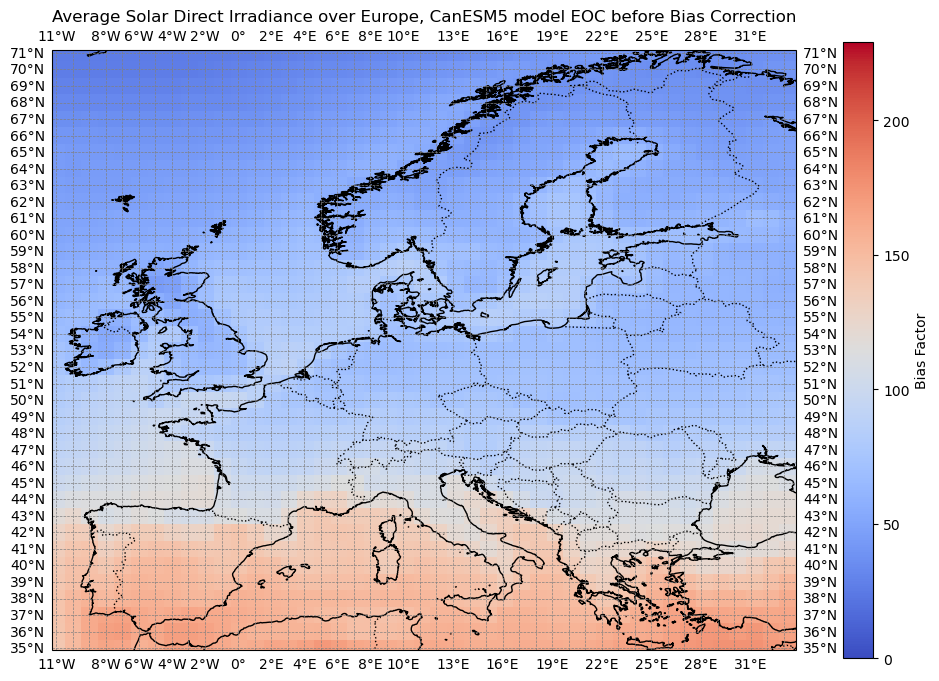

In [39]:
# Get lat/lon values
lon = rsds_model_mean_cut.lon.values 
lat = rsds_model_mean_cut.lat.values

lon_era5=rsds_era5_mean_cut.lon.values
lat_era5=rsds_era5_mean_cut.lat.values

lon_min, lon_max = lon.min(), lon.max()
lat_min, lat_max = lat.min(), lat.max()


# Ensure lon/lat are 2D using meshgrid
# Ensure lon/lat are 2D using meshgrid
lon_edges = np.linspace(lon_era5.min(), lon_era5.max()+0.25, biased_values.shape[1] )
lat_edges = np.linspace(lat_era5.min(), lat_era5.max(), biased_values.shape[0] )
lon2d, lat2d = np.meshgrid(lon_edges, lat_edges)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
# Set the exact extent to match the dataset boundaries
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Plot the bias factor (masked)
c = ax.pcolormesh(
    lon2d, lat2d, corrected_rsds_model_EOC,  # Ensure correct shapes
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for bias factor
    shading='auto',
    vmin=0,
    vmax=rsds_model_mean_EOC_interp_cut.max().values
   
)

# Add map features
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.set_title("Average Solar Direct Irradiance over Europe, CanESM5 model EOC before Bias Correction")

# Add gridlines for each latitude and longitude
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--', xlocs=rsds_era5_mean_interp_cut.lon, ylocs=rsds_era5_mean_interp_cut.lat, x_inline=False, y_inline=False)

# Add colorbar
cbar = fig.colorbar(c, ax=ax, orientation='vertical', label='Bias Factor')

plt.show() 